# NYC Housing data

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')
%matplotlib inline

In [94]:
file = 'rollingsales_manhattan.xls'
df = pd.read_excel(file, header=4)
df.dropna(inplace=True)
df.columns = [c.lower().replace(' ', '_') for c in df.columns]

In [95]:
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,,A4,526 EAST 5TH STREET,,...,1,0,1,1883,5200,1900,1,A4,6500000,2015-03-18
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,402,42,,S1,96 AVENUE B,,...,1,1,2,1400,1839,1901,1,S1,0,2014-12-05
2,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,,C0,243 EAST 7TH STREET,,...,3,0,3,2381,3084,1899,1,C0,2900000,2015-06-24
3,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,,C0,243 EAST 7TH STREET,,...,3,0,3,2381,3084,1899,1,C0,2900000,2014-11-26
4,1,ALPHABET CITY,04 TAX CLASS 1 CONDOS,1C,399,1101,,R6,238 EAST 4TH STREET,-,...,1,0,1,0,0,1955,1,R6,6995000,2015-06-15


### Looking at distributions in the data


In [96]:
lower = 1e4
upper = 1e10
subset_df = df[(df["sale_price"] >= lower) & (df["sale_price"] <= upper) 
               & (df["gross_square_feet"] != 0) & (df["residential_units"] != 0)]

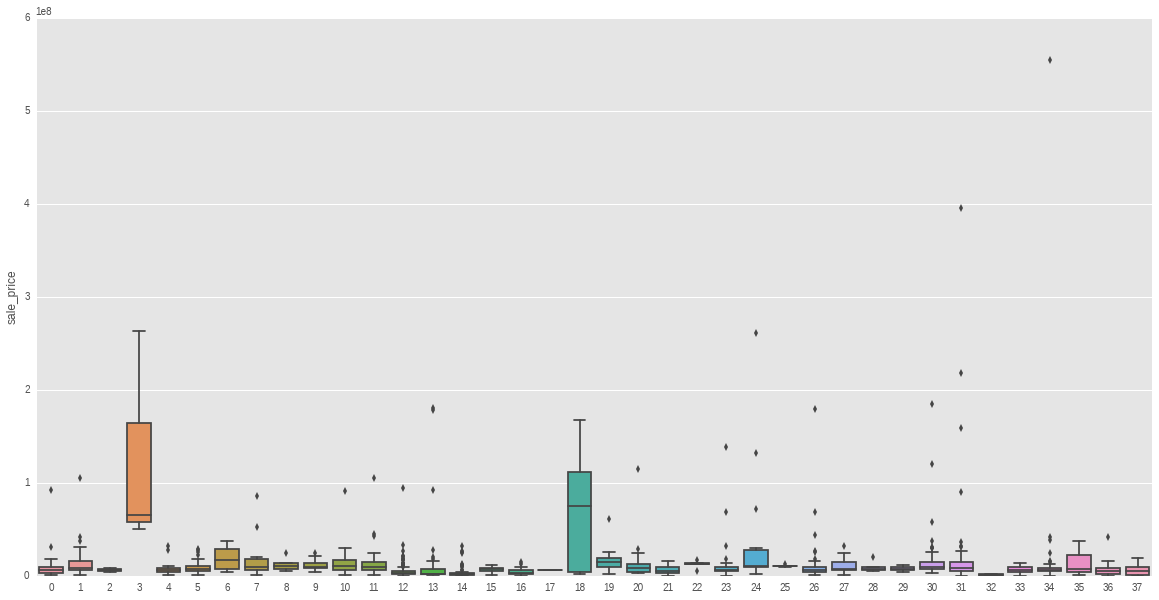

In [97]:
plt.figure(figsize=(20,10))
x = pd.Categorical.from_array(subset_df["neighborhood"])
y = subset_df["sale_price"]
sns.boxplot(x.codes, y, orient="v")

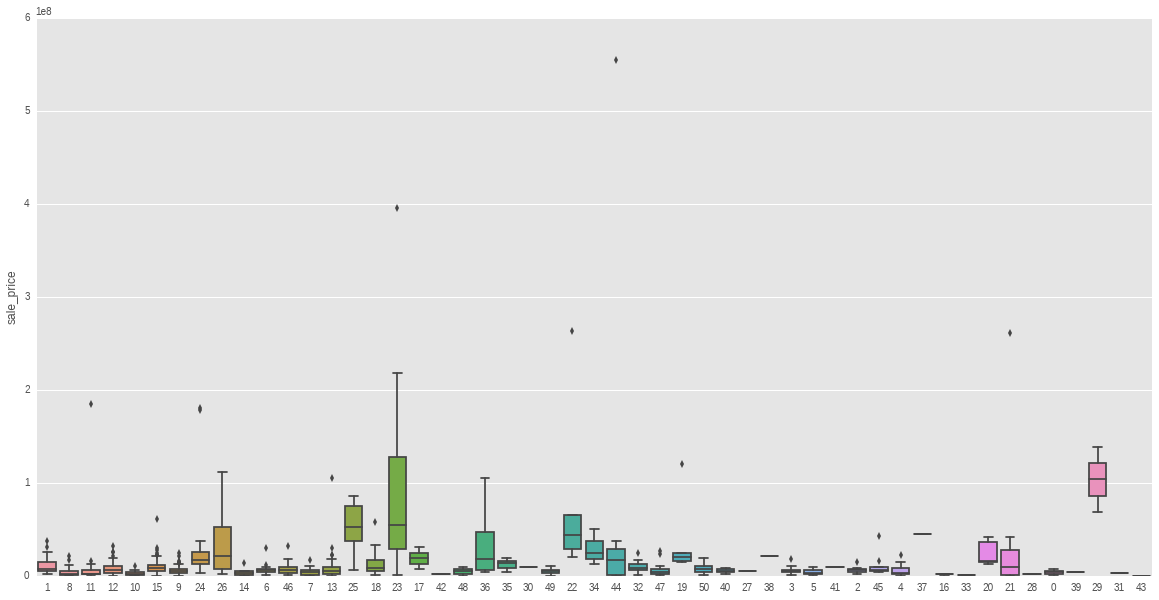

In [98]:
plt.figure(figsize=(20,10))
x = pd.Categorical.from_array(subset_df["building_class_at_time_of_sale"])
y = subset_df["sale_price"]
sns.boxplot(x.codes, y, orient="v")

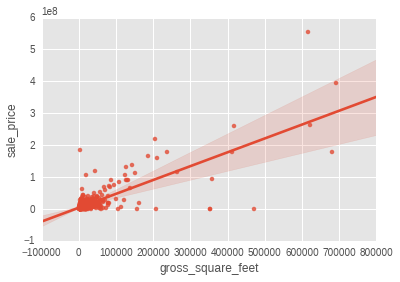

In [99]:
sns.regplot(subset_df["gross_square_feet"], subset_df["sale_price"])

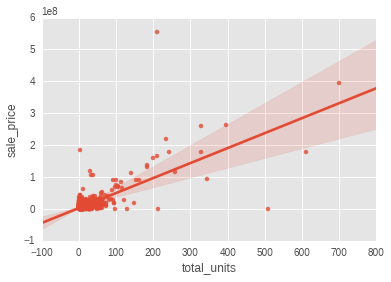

In [100]:
sns.regplot(subset_df["total_units"], subset_df["sale_price"])

### Linear Regression

In [101]:
#formula = ('sale_price ~ C(neighborhood)')
#formula = ('sale_price ~ C(building_class_category)')
#formula = ('sale_price ~ gross_square_feet')
#formula = ('sale_price ~ total_units')
#formula = ('sale_price ~ gross_square_feet + total_units')
formula = ('sale_price ~ C(neighborhood) + C(building_class_at_time_of_sale) + gross_square_feet + total_units')
model = smf.ols(formula, subset_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     26.55
Date:                Mon, 31 Aug 2015   Prob (F-statistic):          5.03e-196
Time:                        09:06:10   Log-Likelihood:                -17894.
No. Observations:                 992   AIC:                         3.597e+04
Df Residuals:                     902   BIC:                         3.641e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
Intercept                                     2.095e+06   1.31e+07      0.160      0.873     -2.36e+07  2.78e+07
C(neighborhood)[T.CHELSEA                  ]  4.985e+06   5.17e+06      0.965      0.335     -5.15e+06  1.51e+07
C(neighborhood)[T.CHINATOWN                ] -1.589e+06   6.73e+06     -0.236      0.813     -1.48e+07  1.16e+07
C(neighborhood)[T.CIVIC CENTER             ] -8.051e+06   1.39e+07     -0.579      0.563     -3.54e+07  1.93e+07
C(neighborhood)[T.CLINTON                  ] -1.713e+06   6.08e+06     -0.282      0.778     -1.36e+07  1.02e+07
C(neighborhood)[T.EAST VILLAGE             ] -9.419e+06   5.53e+06     -1.703      0.089     -2.03e+07  1.44e+06
C(neighborhood)[T.FASHION                  ]  1.021e+07   9.92e+06      1.029      0.304     -9.26e+06  2.97e+07
C(neighborhood)[T.FINANCIAL                ]  2.443e+05   7.43e+06      0.033      0.974     -1.43e+07  1.48e+07
C(neighborhood)[T.FLATIRON                 ]   7.55e+06    9.5e+06      0.795      0.427     -1.11e+07  2.62e+07
C(neighborhood)[T.GRAMERCY                 ]  2.454e+06   6.16e+06      0.398      0.690     -9.64e+06  1.45e+07
C(neighborhood)[T.GREENWICH VILLAGE-CENTRAL]  6.685e+06   5.31e+06      1.259      0.208     -3.74e+06  1.71e+07
C(neighborhood)[T.GREENWICH VILLAGE-WEST   ]  5.517e+06   4.79e+06      1.152      0.250     -3.88e+06  1.49e+07
C(neighborhood)[T.HARLEM-CENTRAL           ] -4.796e+06   4.34e+06     -1.106      0.269     -1.33e+07  3.72e+06
C(neighborhood)[T.HARLEM-EAST              ] -8.494e+06   4.93e+06     -1.724      0.085     -1.82e+07  1.18e+06
C(neighborhood)[T.HARLEM-UPPER             ] -3.938e+06   4.76e+06     -0.828      0.408     -1.33e+07   5.4e+06
C(neighborhood)[T.HARLEM-WEST              ]  -4.68e+06   7.15e+06     -0.654      0.513     -1.87e+07  9.36e+06
C(neighborhood)[T.INWOOD                   ]  -7.11e+06   5.51e+06     -1.289      0.198     -1.79e+07  3.71e+06
C(neighborhood)[T.JAVITS CENTER            ] -1.444e+06   1.79e+07     -0.081      0.936     -3.66e+07  3.37e+07
C(neighborhood)[T.KIPS BAY                 ]  1.982e+07   9.02e+06      2.197      0.028      2.12e+06  3.75e+07
C(neighborhood)[T.LITTLE ITALY             ]  7.377e+06   6.58e+06      1.122      0.262     -5.53e+06  2.03e+07
C(neighborhood)[T.LOWER EAST SIDE          ] -3.015e+05   5.32e+06     -0.057      0.955     -1.07e+07  1.01e+07
C(neighborhood)[T.MANHATTAN VALLEY         ] -4.381e+06   6.23e+06     -0.703      0.482     -1.66e+07  7.85e+06
C(neighborhood)[T.MIDTOWN CBD              ]  3.067e+06   8.63e+06      0.355      0.722     -1.39e+07     2e+07
C(neighborhood)[T.MIDTOWN EAST             ] -3.732e+06   5.56e+06     -0.672      0.502     -1.46e+07  7.17e+06
C(neighborhood)[T.MIDTOWN WEST  

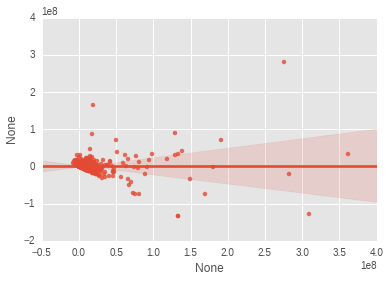

In [102]:
sns.regplot(model.fittedvalues, model.resid)

### k-NN

In [104]:
predictors = ['sale_price', 'total_units']
dfTrain, dfTest = train_test_split(subset_df)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(dfTrain[predictors], dfTrain['neighborhood'])
expected = dfTest['neighborhood']
predicted = knn.predict(dfTest[predictors])
error_rate = (predicted != expected).mean()
print error_rate

0.870967741935
